<a href="https://colab.research.google.com/github/AlejandroDiazRamos/CodingDojoDataScience/blob/main/Ejercicio_Reproducir_interes_vs_grafico_principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
filename = '/content/drive/MyDrive/CodingDojo/DataScience/Matplotlib/mortgages.csv'
df = pd.read_csv(filename)
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


# Tarea
 
El conjunto de datos que se te da aquí es el conjunto de datos hipotecario usado anteriormente en este curso. 
Tu meta es reproducir un gráfico. El plot negro es la hipoteca de 30 años al 5% y la línea azul es al 3%. 
Lo que está graficado es el interés acumulado pagado en el transcurso del préstamo. Nota que no es un gráfico hermoso.
No dice qué línea corresponde a qué hipoteca y el gráfico en sí no es visualmente el más atractivo. 
Estos son los tipos de problemas que se cubren a lo largo del curso. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


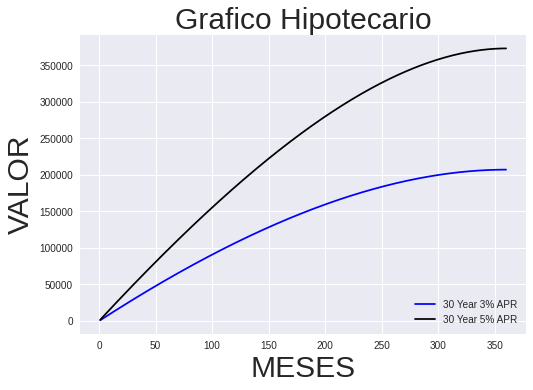

In [24]:
#cumsum() suma acumulativa
# primer acumulativo
filtro1 = df["Interest Rate"] == 0.03
filtro2 = df["Mortgage Name"] == "30 Year"
filtro3 = df['Interest Rate'] == 0.05
df1 = df[(filtro1 & filtro2)]
# se agrega nueva columna y se agrega el interes acumulado
df1['InteresAcumlado1'] = df1['Interest Paid'].cumsum()
# se crea grupo por ordeneado por mes con el interes acumulado
grupo1 = df1.groupby(['Month'])['InteresAcumlado1'].sum()
# se arma el eje x,y
lineaxA=list(grupo1.index)
lineayA=list(grupo1.values)
# se repite para la segunda linea

df2 = df[(filtro3 &filtro2)]
df2['InteresAcumulado2'] = df2['Interest Paid'].cumsum()
grupo2 = df2.groupby(['Month'])['InteresAcumulado2'].sum()

lineaxB=list(grupo2.index)
lineayB=list(grupo2.values)

# se arma el grafico


plt.style.use("seaborn")
plt.plot(lineaxA,lineayA,marker = '', markersize = 10,c='blue',label="30 Year 3% APR")
plt.plot(lineaxB,lineayB,marker = '', markersize = 10,c='black',label="30 Year 5% APR")

plt.legend(loc="lower right")
plt.xlabel("MESES",fontsize="30")
plt.ylabel("VALOR",fontsize="30")
plt.title("Grafico Hipotecario", fontsize = "30");

